# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
      * [3.3.1 Scatterplots of numeric features against ticket price](#3.5.1_Scatterplots_of_numeric_features_against_ticket_price)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
  * [3.10 Summary](#3.10_Summary)

## 3.2 Introduction<a id='3.2_Introduction'></a>

Here in Exploratory Data Analysis we will get a better understanding of the Dataset, learn about the main characteristics of the data and discover some of the patterns or correlations between key data variables. 

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

from library.sb_utils import save_file

### 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

In [2]:
# load and read the Dataset Cleveland.csv on woking directory
# and fed into DataFrame or df
path = MyWorkingDir = '/Users/joeaquino/Downloads/Cleveland.csv'
df = pd.read_csv('/Users/joeaquino/Downloads/Cleveland.csv', header = None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    int64  
 1   1       303 non-null    int64  
 2   2       303 non-null    int64  
 3   3       303 non-null    int64  
 4   4       303 non-null    int64  
 5   5       303 non-null    int64  
 6   6       303 non-null    int64  
 7   7       303 non-null    int64  
 8   8       303 non-null    int64  
 9   9       303 non-null    float64
 10  10      303 non-null    int64  
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [4]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'num']

In [5]:
# Convert all types to best possible types
df2 = df.convert_dtypes()
print(df2.dtypes)

age           Int64
sex           Int64
cp            Int64
trestbps      Int64
chol          Int64
fbs           Int64
restecg       Int64
thalach       Int64
exang         Int64
oldpeak     Float64
slope         Int64
ca           string
thal         string
num           Int64
dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### Finding the correlation among attributes

<AxesSubplot:>

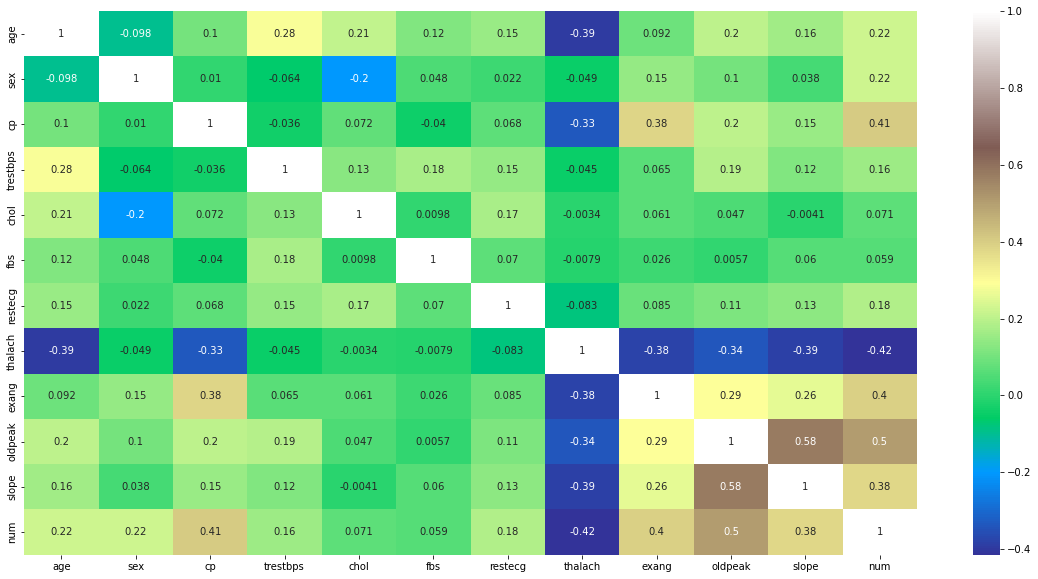

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), annot=True, cmap='terrain')

we observes positive correlation between num and cp, exang, oldpeak, slope and negative correlation between target and thalch.

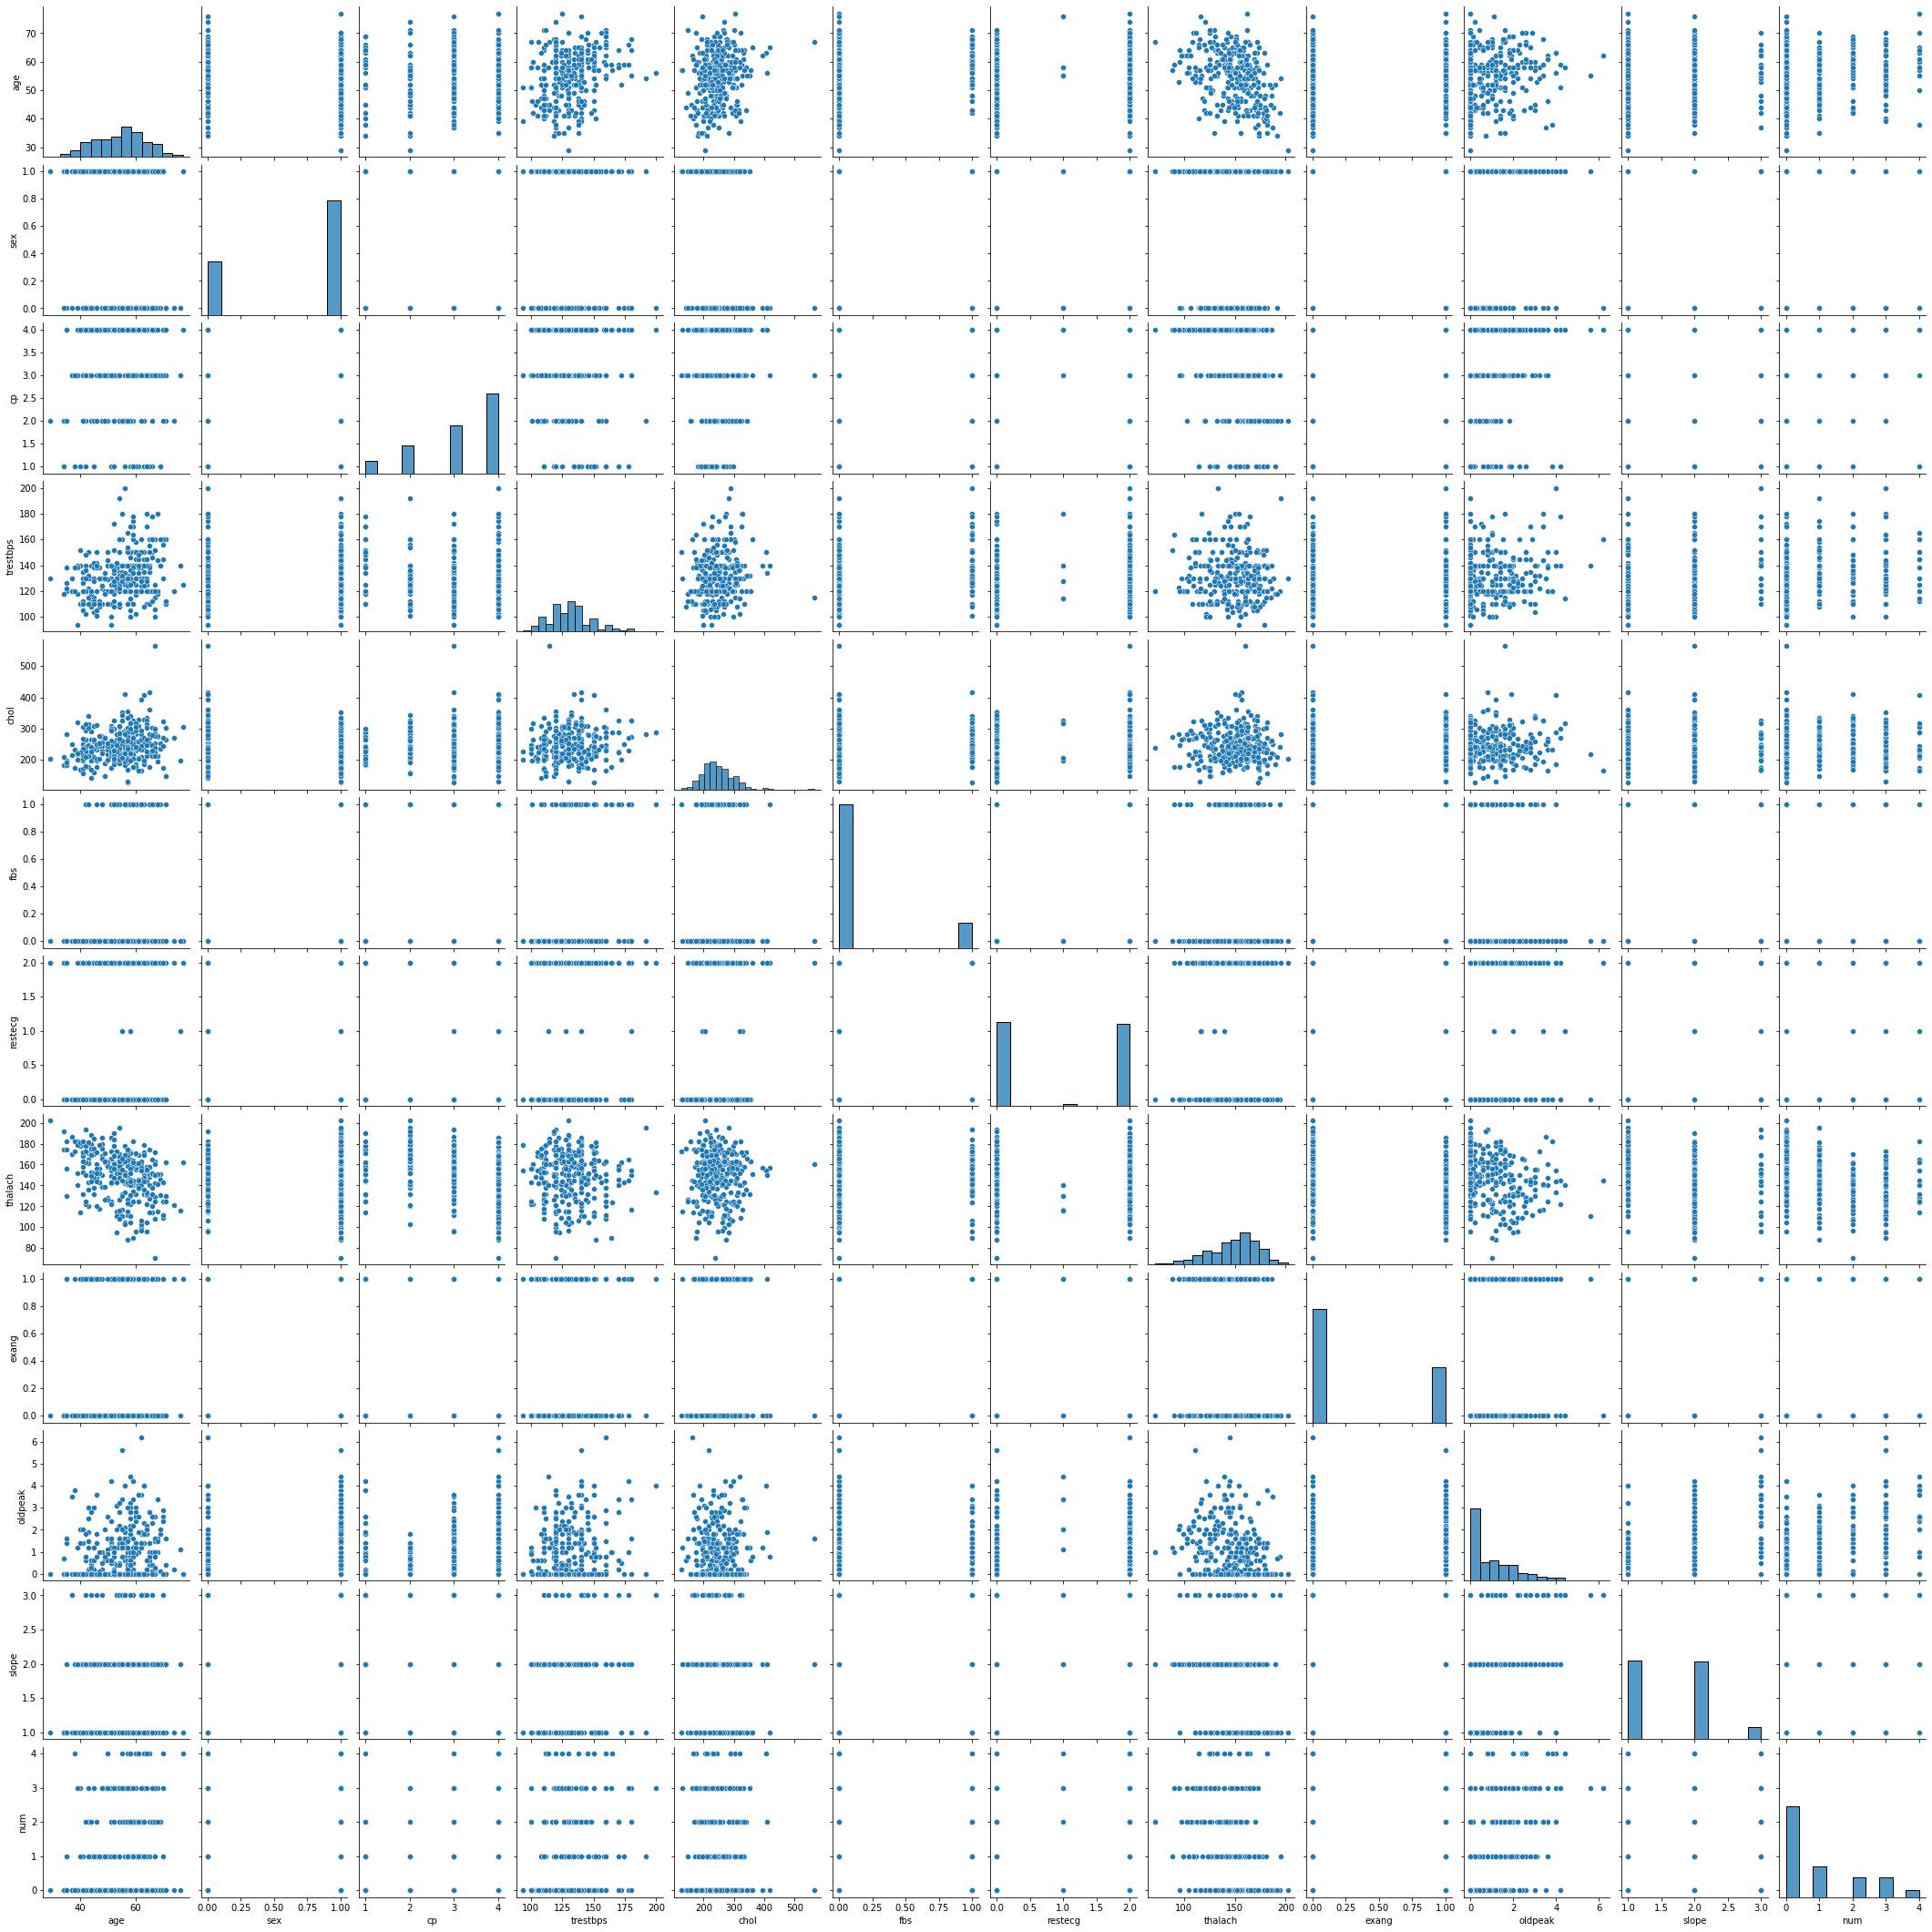

In [8]:
sns.pairplot(data=df2)

PAIRPLOTS... help us to visualized the relationship between differnt features and figure out any linear relation between them.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'num'}>]], dtype=object)

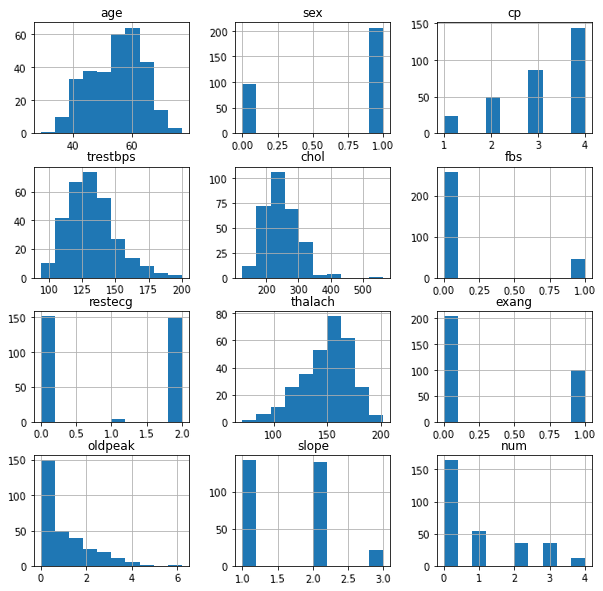

In [9]:
df2.hist(by=None, ax=None, grid=True, xlabelsize=10, xrot=3, ylabelsize=10, yrot=3, figsize=(10,10), bins=10, backend=None, legend=False)

With a Histogram, we can see the shape of each feature and get a count of the observations in each bin

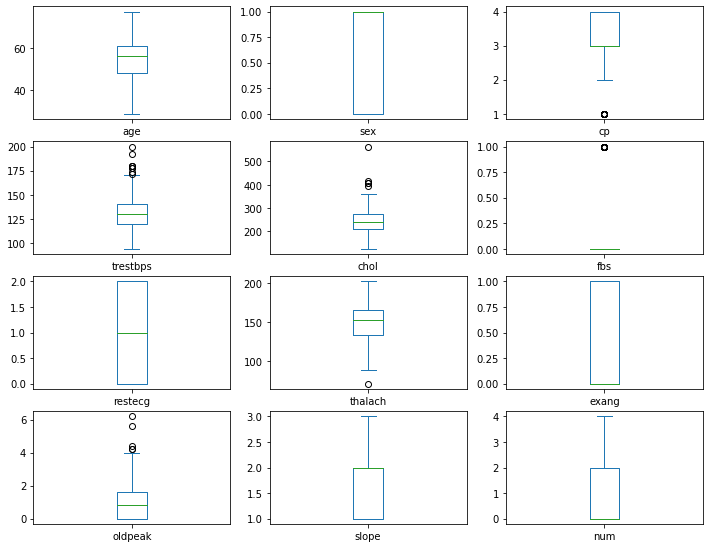

In [10]:
#box and whiskers plot
df2.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

Box and whiskers plots are useful for finding outliers. It is important to remove or fix any outliers; otherwise the training data will become noisy.

### Take a look at the features and their relation to the target.

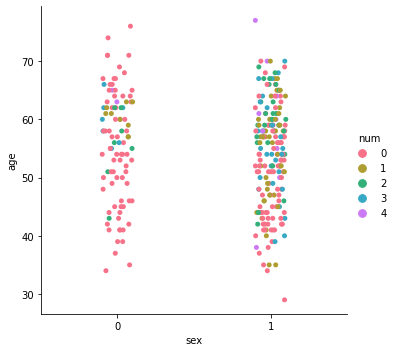

In [11]:
sns.catplot(data=df2, x='sex', y='age', hue='num', palette='husl')

<AxesSubplot:xlabel='sex', ylabel='chol'>

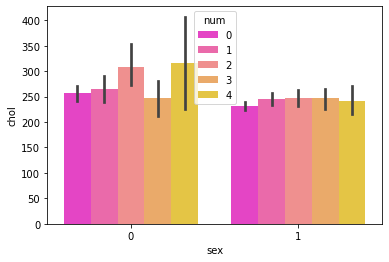

In [12]:
sns.barplot(data=df2, x='sex', y='chol', hue='num', palette='spring')

In [13]:
df2['sex'].value_counts()

1    206
0     97
Name: sex, dtype: Int64

207 are Males and 96 are Females

<AxesSubplot:xlabel='cp', ylabel='count'>

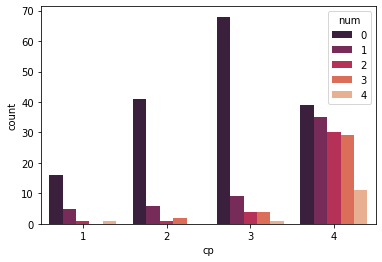

In [14]:
sns.countplot(x='cp',hue='num', data=df2, palette='rocket') 

In [15]:
#crosstab
gen = pd.crosstab(df2['sex'], df2['num'])
print(gen)

num   0   1   2   3   4
sex                    
0    72   9   7   7   2
1    92  46  29  28  11


<AxesSubplot:xlabel='sex'>

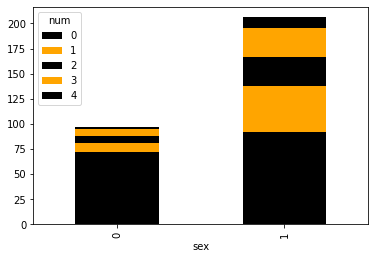

In [16]:
gen.plot(kind='bar', stacked=True, color=['black','orange'], grid=False)

In [17]:
chest_pain = pd.crosstab(df2['cp'], df2['num'])
chest_pain

num,0,1,2,3,4
cp,,,,,
1,16,5,1,0,1
2,41,6,1,2,0
3,68,9,4,4,1
4,39,35,30,29,11


<AxesSubplot:xlabel='cp'>

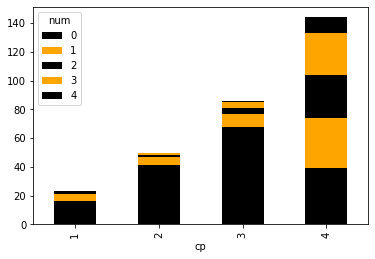

In [18]:
chest_pain.plot(kind='bar', stacked=True, color=['black','orange'], grid=False)